In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

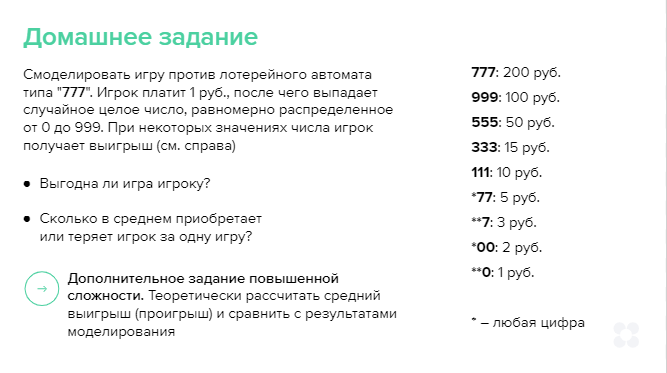

In [2]:
from IPython.display import Image
Image("hw_pic.png")

# Проверим результат перебором: 


### Служебные функции:

In [70]:
prizes = {111:10,
         333:15,
         555:50,
         999:100,
         777:200,
         0:1,
         7:3,
         77:5}

def c3po(val): 
    if val in prizes:
        return prizes[val]
    if len(str(val)) == 1: 
        return 0
    
    if ( str(val)[-2:] == '77' ) :
        return 5
    if ( str(val)[-2:] == '00' ) :
        return 2
    
    if ( str(val)[-1:] == '7' ) :
        return 3
    if ( str(val)[-1:] == '0' ) :
        return 1
 
    return 0


In [69]:
#--- проверим работу
{x:c3po(x) for x in np.random.randint(min_,max_,10)}

{35: 0, 554: 0, 524: 0, 847: 3, 827: 3, 185: 0, 808: 0, 947: 3, 652: 0, 383: 0}

In [162]:
selection = 10000000 # объем выборки
min_ = 0             # минимальное число
max_ = 1000          # макисмальное число
win_amount = 0       # общий выигрыш

np.random.seed(None)

for  i in range(0,selection,1):
    value = np.random.randint(min_,max_)
    prize = c3po(value) - 1
    win_amount += prize

print(f"Средний {'выигрыш' if win_amount > 0 else 'проигрыш'} из {selection} попыток равен {abs(win_amount/selection)}" + "\n" + '-' * 50)
print("\t" + f"Игра для игрока {'выгодна' if win_amount > 0 else 'не выгодна'} ")
print("\t" + f"В среднем игрок за одну игру {'выигрывает' if win_amount > 0 else 'проигрывает'} {abs(round(win_amount/selection,2))} руб.")


Средний проигрыш из 10000000 попыток равен 0.1984272
--------------------------------------------------
	Игра для игрока не выгодна 
	В среднем игрок за одну игру проигрывает 0.2 руб.


# Проверим результат теоретически: 

Посчитаем вероятности выпадения каждого числа:

In [149]:
prob = pd.DataFrame(columns=['Combination', 'Probability, %', 'Prize'])

prob = prob.append({'Combination':'**0', 'Probability, %':10, 'Prize':1}, ignore_index=True)
prob = prob.append({'Combination':'*00', 'Probability, %':1, 'Prize':2}, ignore_index=True)
prob = prob.append({'Combination':'**7', 'Probability, %':10, 'Prize':3}, ignore_index=True)
prob = prob.append({'Combination':'*77', 'Probability, %':1, 'Prize':5}, ignore_index=True)
prob = prob.append({'Combination':'111', 'Probability, %':0.1, 'Prize':10}, ignore_index=True)
prob = prob.append({'Combination':'333', 'Probability, %':0.1, 'Prize':15}, ignore_index=True)
prob = prob.append({'Combination':'555', 'Probability, %':0.1, 'Prize':50}, ignore_index=True)
prob = prob.append({'Combination':'999', 'Probability, %':0.1, 'Prize':100}, ignore_index=True)
prob = prob.append({'Combination':'777', 'Probability, %':0.1 , 'Prize':200}, ignore_index=True)

prob.style.set_properties(**{'text-align':'center'})

,Combination,"Probability, %",Prize
0,**0,10,1
1,*00,1,2
2,**7,10,3
3,*77,1,5
4,111,0.100000,10
5,333,0.100000,15
6,555,0.100000,50
7,999,0.100000,100
8,777,0.100000,200


Добавим проигрыш:

In [150]:
prob = prob.append({'Combination':'lose', 'Probability, %':100 - float(round(sum(prob['Probability, %']),2) ), 'Prize':0}, ignore_index=True)
prob.style.set_properties(**{'text-align':'center'})

,Combination,"Probability, %",Prize
0,**0,10,1
1,*00,1,2
2,**7,10,3
3,*77,1,5
4,111,0.100000,10
5,333,0.100000,15
6,555,0.100000,50
7,999,0.100000,100
8,777,0.100000,200
9,lose,77.500000,0


Учитываем стоимость игры = 1руб. Тогда реальный приз = **(Prize - 1)** :

In [151]:
prob['Real Prize'] = prob['Prize'].apply(lambda x: x-1)
prob.style.set_properties(**{'text-align':'center'})

,Combination,"Probability, %",Prize,Real Prize
0,**0,10,1,0
1,*00,1,2,1
2,**7,10,3,2
3,*77,1,5,4
4,111,0.100000,10,9
5,333,0.100000,15,14
6,555,0.100000,50,49
7,999,0.100000,100,99
8,777,0.100000,200,199
9,lose,77.500000,0,-1


Используем формулу полной вероятности:

\begin{equation}
P(A) =\sum_{i=0}^\infty P({A}/{Hi} ) \times P(Hi) 
\end{equation}

\begin{equation}
\sum_{i=0}^\infty P(Hi) = 1 
\end{equation}

In [155]:
prob['P(A/H)*P(H)'] = prob.apply(lambda x: x['Probability, %']/100 * x['Real Prize'] ,axis = 1)
prob.style.set_properties(**{'text-align':'center'})

,Combination,"Probability, %",Prize,Real Prize,Probability of real prize,P(A/H)*P(H)
0,**0,10,1,0,0.000000,0.000000
1,*00,1,2,1,0.010000,0.010000
2,**7,10,3,2,0.200000,0.200000
3,*77,1,5,4,0.040000,0.040000
4,111,0.100000,10,9,0.009000,0.009000
5,333,0.100000,15,14,0.014000,0.014000
6,555,0.100000,50,49,0.049000,0.049000
7,999,0.100000,100,99,0.099000,0.099000
8,777,0.100000,200,199,0.199000,0.199000
9,lose,77.500000,0,-1,-0.775000,-0.775000


In [165]:
P_A = round(sum(prob['P(A/H)*P(H)']),2)
            
print(f" Средний выигрыш { P_A } руб. " + "\n" + '-' * 50) 
#print(f"Средний {'выигрыш' if P_A > 0 else 'проигрыш'} из {selection} попыток равен {abs(win_amount/selection)}" + "\n" + '-' * 50)
print("\t" + f"Игра для игрока {'выгодна' if P_A > 0 else 'не выгодна'} ")
print("\t" + f"В среднем игрок за одну игру {'выигрывает' if P_A > 0 else 'проигрывает'} { abs( P_A ) } руб.")


 Средний выигрыш -0.15 руб. 
--------------------------------------------------
	Игра для игрока не выгодна 
	В среднем игрок за одну игру проигрывает 0.15 руб.


# Результаты:

Результат перебора : " В среднем игрок за одну игру проигрывает 0.2 руб. "   
Результат теоретический : "В среднем игрок за одну игру проигрывает 0.15 руб."